notes:
no data dictionary present
assumptions:
- id - unique id for house
- price - price of the house
- bedrooms - number of bedrooms in the house
- sqft_living - sqft the house itself is in the land
- sqft_lot - sqft of outside of the house is in the land
- floors - number of floors in the house
- waterfront - any waterfront property

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df = df.dropna()
print(df.shape)

(21613, 21)


In [ ]:
sns.pairplot(df)

## Descion Tree Regression

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the dataset
X = df[['bathrooms', 'bedrooms','floors', 'sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

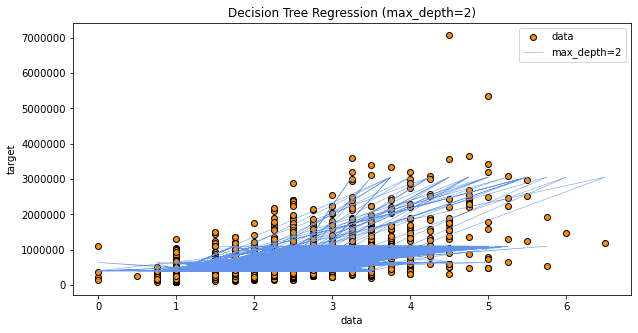

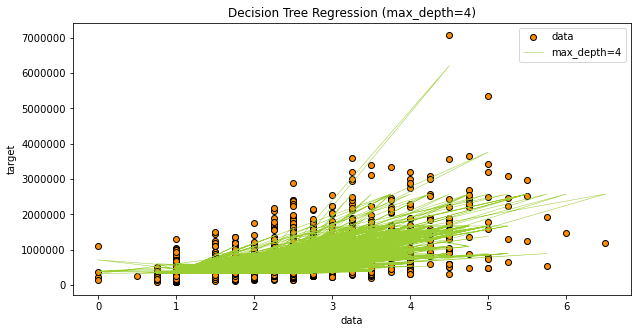

In [4]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

regr_2 = DecisionTreeRegressor(max_depth=4)
regr_2.fit(X_train, y_train)

y_pred = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)


plt.figure(figsize=(10, 5))
plt.scatter(X_test['bathrooms'], y_test, s=None, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test['bathrooms'], y_pred, color="cornflowerblue", label="max_depth=2", linewidth=0.5)

plt.xlabel("data")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("target")
plt.title("Decision Tree Regression (max_depth=2)")
plt.legend()
plt.show()


# Plot for the second model
plt.figure(figsize=(10, 5))
plt.scatter(X_test['bathrooms'], y_test, s=None, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test['bathrooms'], y_pred2, color="yellowgreen", label="max_depth=4", linewidth=0.5)
plt.xlabel("data")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("target")
plt.title("Decision Tree Regression (max_depth=4)")
plt.legend()
plt.show()

### Accuracy

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred2)

# Calculate R-squared
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 183147.72249322088
Mean Squared Error: 78291565699.96825
R-squared: 0.43105278581439743
Mean Absolute Error: 168779.02268827293
Mean Squared Error: 63266056030.27473
R-squared: 0.5402436263840149


## Simple Linear Regression

Text(0, 0.5, 'price')

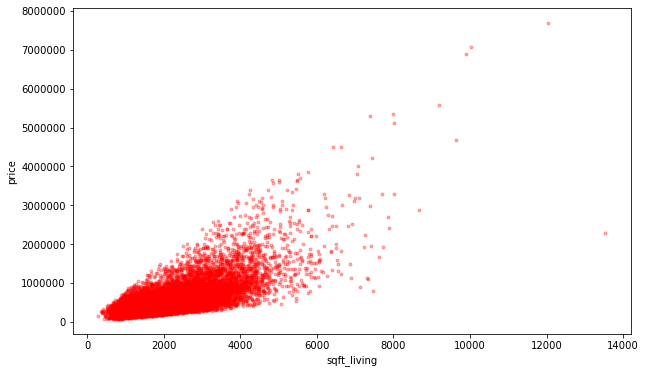

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['sqft_living'], df['price'], 'r.', alpha = 0.3)
plt.xlabel("sqft_living")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("price")

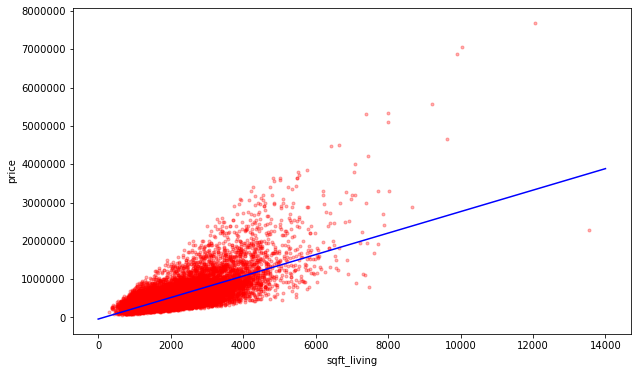

In [7]:
from sklearn.linear_model import LinearRegression

# Simple linear regression
model_slm = LinearRegression()
model_slm.fit(df[['sqft_living']], df['price'])

beta0 = model_slm.intercept_
beta1 = model_slm.coef_[0]

plt.figure(figsize=(10, 6))
plt.plot(df['sqft_living'], df['price'], 'r.', alpha = 0.3)
plt.xlabel("sqft_living")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("price")

x_coordinates = np.array([0, 14000])
y_coordinates = x_coordinates * beta1 + beta0
plt.plot(x_coordinates, y_coordinates, 'b-')

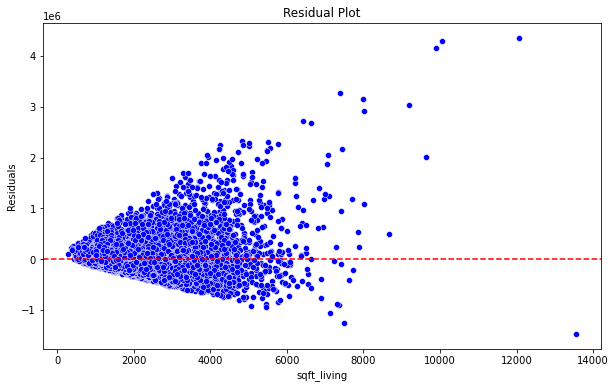

In [27]:
# Predictions using the model
y_pred = model_slm.predict(df[['sqft_living']])

# Calculate residuals
residuals = df['price'] - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))  # Define figure size
sns.scatterplot(x=df['sqft_living'], y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('sqft_living')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#define response variable
y = df['price']

#define explanatory variable
x = df[['sqft_living']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

est = smf.ols('price ~ sqft_living', df).fit()
est.summary().tables[1]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:06:11   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-4.358e+04,4402.690,-9.899,0.000,-5.22e+04,-3.5e+04
sqft_living,280.6236,1.936,144.920,0.000,276.828,284.419


## Multi-linear Regression

In [13]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the dataset
X = df[['bathrooms', 'bedrooms','floors', 'sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [14]:
model = LinearRegression() 
model.fit(X_train,y_train)
predictions = model.predict(X_test) 

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

Intercept:  68603.87847451615
Coefficients:  [ 10628.58554958 -54994.72390448    454.73865919    303.74829336]
mean_squared_error :  67569037573.22856
mean_absolute_error :  172069.65721824998
R-squared: 0.5089737272618333


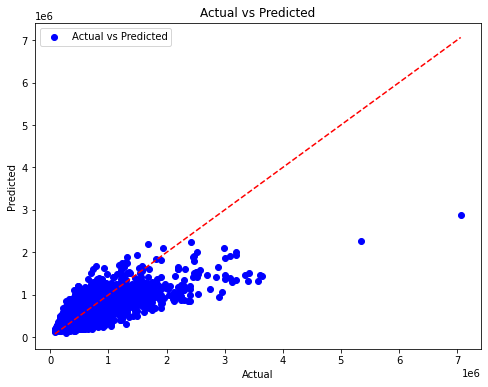

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()